## load tantinic dataset 

In [1]:
import torch

# 检查 GPU 是否可用
print(torch.cuda.is_available())  # 返回 True 表示可用
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 查看当前 GPU 设备名称
print(torch.cuda.get_device_name(0))  # 例如: 'NVIDIA GeForce RTX 3090'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

import time

True
Using device: cuda:0
NVIDIA GeForce RTX 5060 Ti
Using device: cuda:0


In [2]:
import torch

# 检查 GPU 是否可用
print(torch.cuda.is_available())  # 返回 True 表示可用
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 查看当前 GPU 设备名称
print(torch.cuda.get_device_name(0))  # 例如: 'NVIDIA GeForce RTX 3090'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

import time

True
Using device: cuda:0
NVIDIA GeForce RTX 5060 Ti
Using device: cuda:0


In [3]:
# import torch

# import matplotlib.pyplot as plt
# from torch.utils.data import Dataset #抽象类
# from torch.utils.data import DataLoader
# import numpy as np
# import pandas as pd
# from scipy.stats import mode
# class DiabetesDataset(Dataset):
#     def __init__(self,filepath):
#         df = pd.read_csv(filepath,header= 0)  # 自动处理混合类型
#         xy = df.values  # 转换为numpy数组（dtype=object）
#         print(df.dtypes)  # 查看每列的数据类型
        
#         #age
#         age_col = xy[:, 5].astype(float)
#         mean_age = np.nanmean(age_col)
#         print(f"年龄均值: {mean_age:.1f}") 
#         xy[:, 5] = np.where(np.isnan(age_col), mean_age, age_col)
        
#         gender_map = {'male': 0, 'female': 1,'nan' : 2}
#         xy[:, 4] = np.array([gender_map[x] for x in xy[:, 4]])
        
#         # Embarked
#         empty_mask = pd.isna(xy[:, 11]) | (xy[:, 11] == "")
#         embarked_mode = pd.Series(xy[:, 11]).mode()[0]  # 输出 'S'
#         xy[empty_mask, 11] = embarked_mode

#         Embarked_map = {'S': 0, 'C': 1,'Q': 2 }
#         xy[:, 11] = np.array([Embarked_map[x] for x in xy[:, 11]])
        
#         self.x_data = torch.from_numpy(xy[:, [2,4,5,6,7,9,11]].astype(np.float32))
#         # print (self.x_data)
#         self.y_data = torch.from_numpy(xy[:, [1]].astype(np.float32))
#         # print("y_data = ",self.y_data)
#         self.len = xy.shape[0]
        
#     def __getitem__(self,index):
#         return self.x_data[index],self.y_data[index]
#     def __len__(self):
#         return self.len
# class Model(torch.nn.Module):
#     def __init__(self):
#         super(Model, self).__init__()
#         self.linear1 = torch.nn.Linear(7, 6)
#         self.linear2 = torch.nn.Linear(6, 4)
#         self.linear3 = torch.nn.Linear(4, 1)
#         self.sigmoid = torch.nn.Sigmoid()
#         self.relu = torch.nn.ReLU()

#     def forward(self, x):
#         x = self.relu( self.linear1(x))
#         x = self.relu( self.linear2(x))
#         x = self.sigmoid( self.linear3(x))
#         return x


# model = Model().to(device)

# criterion = torch.nn.BCELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from scipy.stats import mode

# 设置设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class DiabetesDataset(Dataset):
    def __init__(self, filepath):
        df = pd.read_csv(filepath, header=0)
        xy = df.values
        
        # 处理年龄列（填充缺失值）
        age_col = xy[:, 5].astype(float)
        mean_age = np.nanmean(age_col)
        print(f"年龄均值: {mean_age:.1f}")
        xy[:, 5] = np.where(np.isnan(age_col), mean_age, age_col)
        
        # 处理性别列
        gender_map = {'male': 0, 'female': 1, 'nan': 2}
        xy[:, 4] = np.array([gender_map.get(str(x).lower(), 2) for x in xy[:, 4]])
        
        # 处理Embarked列
        empty_mask = pd.isna(xy[:, 11]) | (xy[:, 11] == "")
        embarked_mode = pd.Series(xy[:, 11]).mode()[0]
        xy[empty_mask, 11] = embarked_mode
        Embarked_map = {'S': 0, 'C': 1, 'Q': 2}
        xy[:, 11] = np.array([Embarked_map.get(str(x).upper(), 0) for x in xy[:, 11]])
        
        # 转换为张量并移动到设备
        self.x_data = torch.from_numpy(xy[:, [2,4,5,6,7,9,11]].astype(np.float32)).to(device)
        self.y_data = torch.from_numpy(xy[:, [1]].astype(np.float32)).to(device)
        self.len = xy.shape[0]
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(7, 6)
        self.linear2 = nn.Linear(6, 4)
        self.linear3 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x


Using device: cuda:0


In [5]:
model = Model().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [6]:
import torch
print(torch.version.cuda)  # PyTorch 编译时的 CUDA 版本

12.9


年龄均值: 29.7
执行耗时: 0.1782 秒 epoch =  0 loss =  0.825748081971868


C:\Users\admin\AppData\Local\Temp\ipykernel_16560\522677336.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


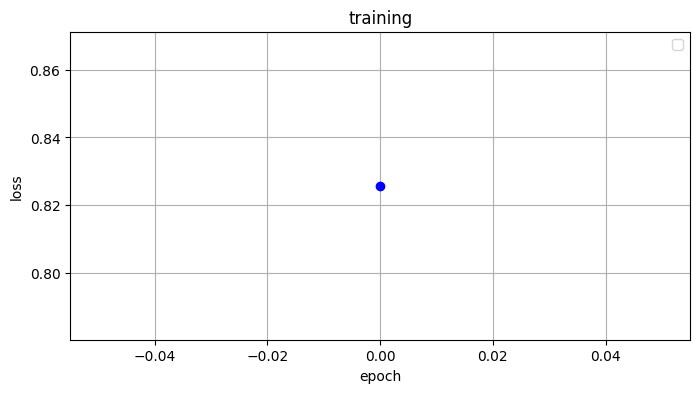

In [7]:
# 训练循环示例
def train(dataloader, model, criterion, optimizer, epochs=100):
    batch_size= 32
    epoch_list = []
    cost_list =[]
    model.train()
    for epoch in range(epochs):
        loss_sum =0
        start_time = time.time()
        for batch_idx, (data, target) in enumerate(dataloader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss_sum += loss.item()
            loss.backward()
            optimizer.step()
            
            # if batch_idx % 10 == 0:
            #     print(f'Epoch: {epoch+1}/{epochs} | Batch: {batch_idx} | Loss: {loss.item():.4f}')
        elapsed_time = time.time() - start_time
        if epoch % 100 ==0:
                print(f"执行耗时: {elapsed_time:.4f} 秒",'epoch = ',epoch,'loss = ',loss_sum / (len(dataset) / batch_size + 1))
       
        cost_list.append(loss_sum / (len(dataset) / batch_size + 1))
        epoch_list.append(epoch)
        return epoch_list,cost_list

# 使用示例
if __name__ == "__main__":
    path = '../../dataset/titanic/train.csv' 
    # '../dataset/titanic/train.csv'
    dataset = DiabetesDataset(path)
    train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
    epoch_list , cost_list = train(train_loader, model, criterion, optimizer,1000000000)
    plt.figure(figsize=(8, 4))  # 设置图形大小
    plt.plot(epoch_list, cost_list, marker='o', linestyle='-', color='b')
    
    # 添加标题和标签
    plt.title('training')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    
    # 显示图形
    plt.grid(True)  # 添加网格
    plt.show()


In [8]:
class TitanicDataset(Dataset):
    def __init__(self,filepath):
        df = pd.read_csv(filepath,header= 0)  # 自动处理混合类型
        xy = df.values  # 转换为numpy数组（dtype=object）
        print(df.dtypes)  # 查看每列的数据类型
        
        #age
        age_col = xy[:, 4].astype(float)
        mean_age = np.nanmean(age_col)
        print(f"年龄均值: {mean_age:.1f}") 
        xy[:, 4] = np.where(np.isnan(age_col), mean_age, age_col)
        gender_map = {'male': 0, 'female': 1,'nan' : 2}
        xy[:, 3] = np.array([gender_map[x] for x in xy[:, 3]])
        
        # Embarked
        empty_mask = pd.isna(xy[:, 10]) | (xy[:, 10] == "")
        embarked_mode = pd.Series(xy[:, 10]).mode()[0]  # 输出 'S'
        xy[empty_mask, 10] = embarked_mode

        Embarked_map = {'S': 0, 'C': 1,'Q': 2 }
        xy[:, 10] = np.array([Embarked_map[x] for x in xy[:, 10]])
        
        self.x_data = torch.from_numpy(xy[:, [1,3,4,5,6,8,10]].astype(np.float32)).to(device)
        # print (self.x_data)
        # self.y_data = torch.from_numpy(xy[:, [1]].astype(np.float32))
        # # print("y_data = ",self.y_data)
        self.len = xy.shape[0]
        
    def __getitem__(self,index):
        return self.x_data[index]
    def __len__(self):
        return self.len

In [12]:
path = '../../dataset/titanic/test.csv'
test_data = TitanicDataset(path)
test_loader = DataLoader(dataset=test_data,batch_size= 32,shuffle=False,num_workers=0)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
年龄均值: 30.3


In [13]:
for i,data in enumerate(test_loader,0):
    # prepare data
    inputs = data
    # forward
    y_pred  = model(inputs)
    print ('y_pred = ',y_pred)

y_pred =  tensor([[0.4837],
        [0.4850],
        [0.4553],
        [0.4989],
        [0.5045],
        [0.5187],
        [0.4939],
        [0.4819],
        [0.5152],
        [0.4933],
        [0.4945],
        [0.4585],
        [0.4417],
        [0.4292],
        [0.4255],
        [0.4889],
        [0.4817],
        [0.5076],
        [0.5028],
        [0.4730],
        [0.4101],
        [0.5308],
        [0.4804],
        [0.4585],
        [0.2460],
        [0.4574],
        [0.4592],
        [0.5052],
        [0.4619],
        [0.4791],
        [0.4493],
        [0.4845]], device='cuda:0', grad_fn=<SigmoidBackward0>)
y_pred =  tensor([[0.4772],
        [0.4786],
        [0.4501],
        [0.5115],
        [0.4973],
        [0.5112],
        [0.5012],
        [0.4462],
        [0.4715],
        [0.4826],
        [0.4778],
        [0.4961],
        [0.4370],
        [0.5028],
        [0.4543],
        [0.4904],
        [0.3890],
        [0.4770],
        [0.4593],
        [0.4937]